**Step 1:Data Preprocessing**

In [42]:
import pandas as pd

# Load the data into a Pandas DataFrame
file_path = '/content/Sample Data.xlsx'
data = pd.read_excel(file_path)

In [43]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


BRAND                            0
week_year                        0
Weeks                            0
CONSUMPTION                      0
PACK SIZE                        0
sum_Sales                        0
sum_Units                        0
sum_EQ_Lbs                       0
sum_Disc_Spends                  0
sum_Own_TDP                      0
sum_Disp_wo_Feat_DiscAcv         0
sum_Feat_wo_Disp_DiscAcv         0
sum_Feat_and_Disp_DiscAcv        0
Disc_per_unit                    0
Price_per_pound                  0
Base_price                       0
Coupons/offers _CP_COST          0
Coupons/offers _CP_ACTIVATION    0
Digital_CP_COST                  0
Digital_CP_ACTIVATION            0
In Store_CP_COST                 0
In Store_CP_ACTIVATION           0
CP_TOTAL_COST                    0
Coupons/offers _SM_COST          0
Coupons/offers _SM_ACTIVATION    0
Digital_SM_COST                  0
Digital_SM_ACTIVATION            0
In Store_SM_COST                 0
In Store_SM_ACTIVATI

In [44]:
# Remove duplicates
data.drop_duplicates(inplace=True)


In [45]:
# Display unique values for categorical columns to check for inconsistencies
print(data['CONSUMPTION'].unique())
print(data['PACK SIZE'].unique())


['FC' 'IC']
['FC SMALL' 'FC MEDIUM' 'IC MEDIUM' 'FC LARGE' 'AO FC PACK SIZE'
 'IC LARGE' 'FC XL' 'IC SMALL' 'AO IC PACK SIZE' 'FC XXL']


In [46]:
data['week_year'] = data['week_year'].astype(str)


In [47]:
# Extract the date part from 'Weeks' column and convert to datetime
data['Weeks'] = data['Weeks'].str.extract(r'(\d{2}/\d{2}/\d{2})')[0]
data['Weeks'] = pd.to_datetime(data['Weeks'], format='%m/%d/%y')


In [48]:
# List of columns to convert to numeric
numeric_cols = [
    'sum_Sales', 'sum_Units', 'sum_EQ_Lbs', 'sum_Disc_Spends', 'sum_Own_TDP',
    'sum_Disp_wo_Feat_DiscAcv', 'sum_Feat_wo_Disp_DiscAcv', 'sum_Feat_and_Disp_DiscAcv',
    'Disc_per_unit', 'Price_per_pound', 'Base_price', 'Coupons/offers _CP_COST',
    'Coupons/offers _CP_ACTIVATION', 'Digital_CP_COST', 'Digital_CP_ACTIVATION',
    'In Store_CP_COST', 'In Store_CP_ACTIVATION', 'CP_TOTAL_COST', 'Coupons/offers _SM_COST',
    'Coupons/offers _SM_ACTIVATION', 'Digital_SM_COST', 'Digital_SM_ACTIVATION',
    'In Store_SM_COST', 'In Store_SM_ACTIVATION', 'Others_SM_COST', 'Others_SM_ACTIVATION',
    'SM_TOTAL_COST'
]

# Convert to numeric
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [49]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the numeric columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


**Step 2:EDA**

In [50]:
# Generate summary statistics for numerical columns
summary_stats = data.describe()
print(summary_stats)


                               Weeks     sum_Sales     sum_Units  \
count                          50190  50190.000000  50190.000000   
mean   2021-01-12 15:37:42.426778624      0.019216      0.016323   
min              2020-01-04 00:00:00      0.000000      0.000000   
25%              2020-07-18 00:00:00      0.001117      0.000678   
50%              2021-01-09 00:00:00      0.007252      0.005074   
75%              2021-07-03 00:00:00      0.019452      0.017838   
max              2022-01-01 00:00:00      1.000000      1.000000   
std                              NaN      0.040503      0.032776   

         sum_EQ_Lbs  sum_Disc_Spends   sum_Own_TDP  sum_Disp_wo_Feat_DiscAcv  \
count  50190.000000     50190.000000  50190.000000              50190.000000   
mean       0.015053         0.003681      0.089510                  0.025421   
min        0.000000         0.000000      0.000000                  0.000000   
25%        0.000621         0.000002      0.002296                 

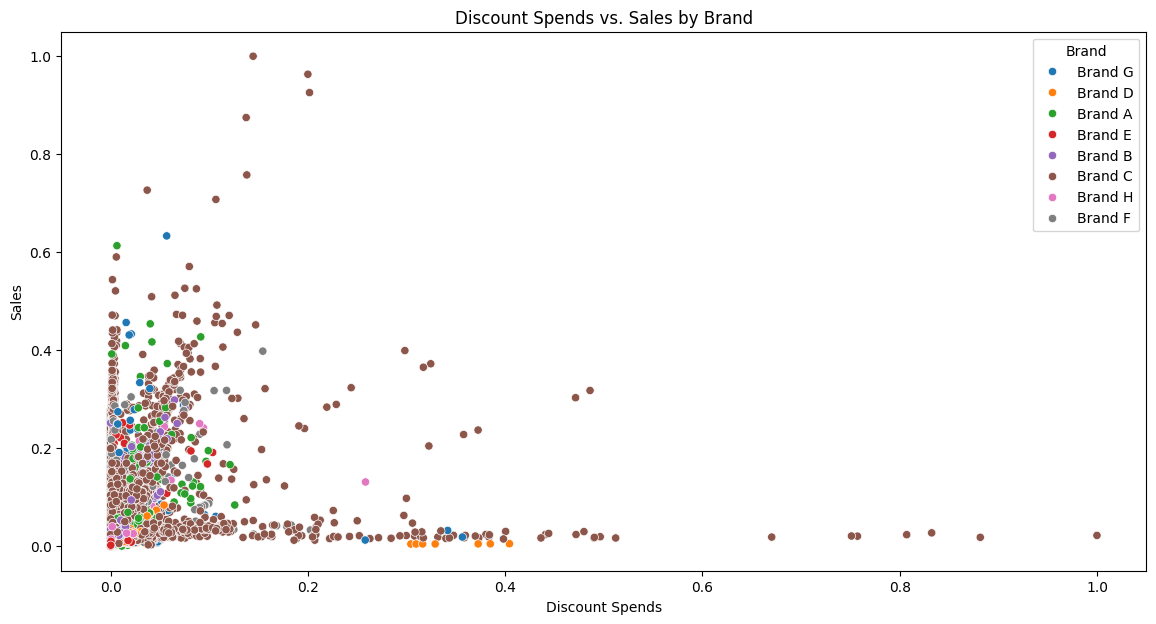

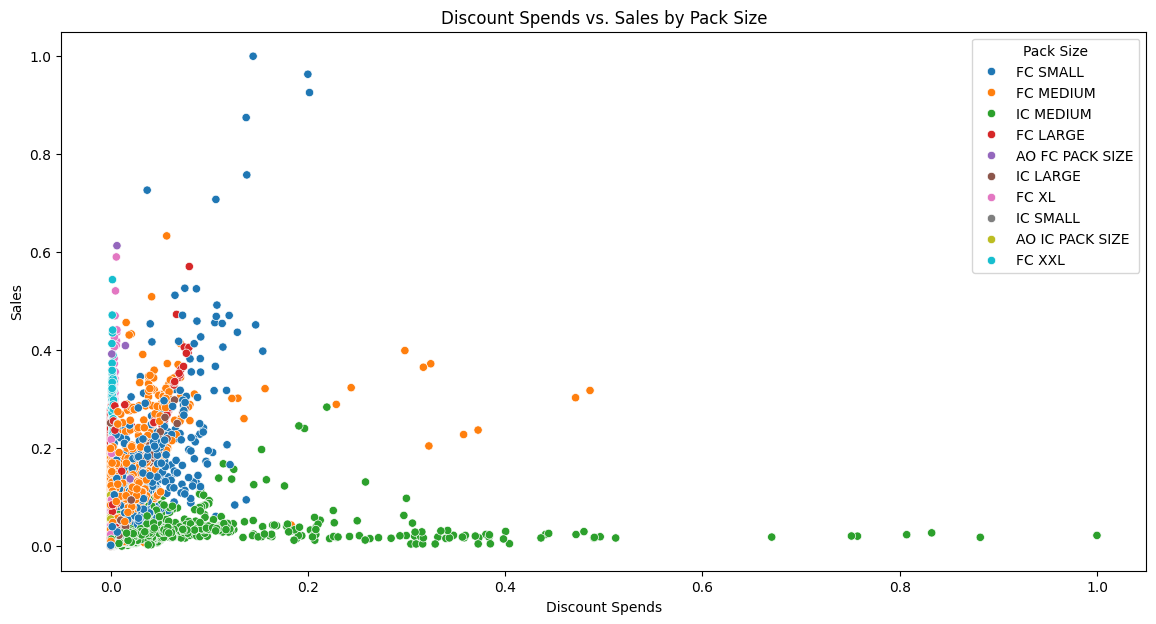

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot for discount spends vs. sales
plt.figure(figsize=(14, 7))
sns.scatterplot(x='sum_Disc_Spends', y='sum_Sales', hue='BRAND', data=data)
plt.title('Discount Spends vs. Sales by Brand')
plt.xlabel('Discount Spends')
plt.ylabel('Sales')
plt.legend(title='Brand')
plt.savefig('Discount Spends vs. Sales by Brand.png')

plt.show()

# Scatter plot for discount spends vs. sales
plt.figure(figsize=(14, 7))
sns.scatterplot(x='sum_Disc_Spends', y='sum_Sales', hue='PACK SIZE', data=data)
plt.title('Discount Spends vs. Sales by Pack Size')
plt.xlabel('Discount Spends')
plt.ylabel('Sales')
plt.legend(title='Pack Size')
plt.savefig('Discount Spends vs. Sales by pack size.png')

plt.show()


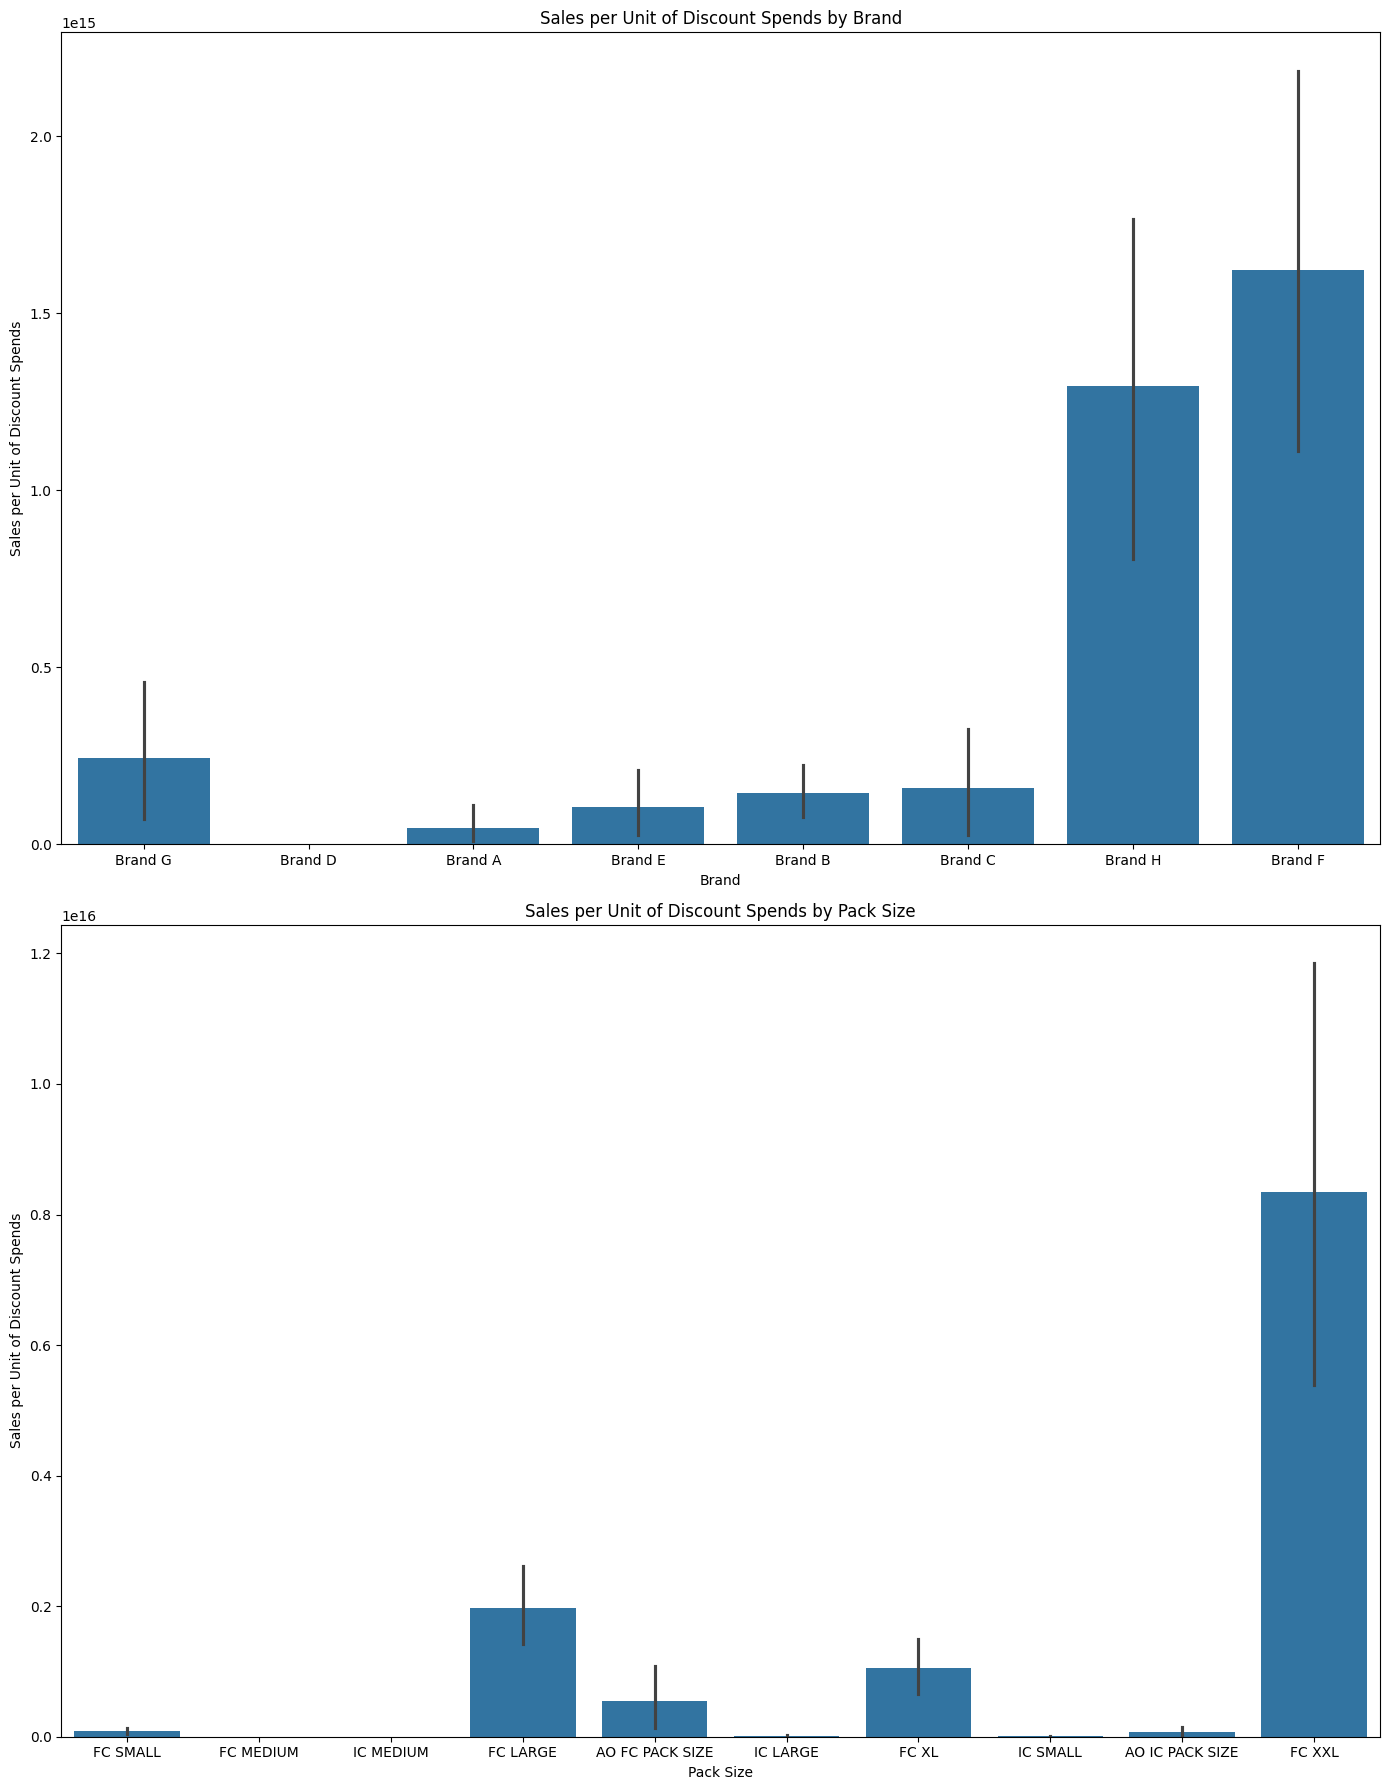

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for sales per unit of discount spends
data['Sales_per_Disc_Spends'] = data['sum_Sales'] / data['sum_Disc_Spends']

# Set up the figure layout with subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 18))

# Bar plot for sales per unit of discount spends by Brand
sns.barplot(ax=ax1, x='BRAND', y='Sales_per_Disc_Spends', data=data, estimator=np.mean)
ax1.set_title('Sales per Unit of Discount Spends by Brand')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Sales per Unit of Discount Spends')

# Bar plot for sales per unit of discount spends by Pack Size
sns.barplot(ax=ax2, x='PACK SIZE', y='Sales_per_Disc_Spends', data=data, estimator=np.mean)
ax2.set_title('Sales per Unit of Discount Spends by Pack Size')
ax2.set_xlabel('Pack Size')
ax2.set_ylabel('Sales per Unit of Discount Spends')

# Adjust layout
plt.tight_layout()

# Save the plot as an image file
plt.savefig('sales_per_disc_spends_visualization.png')

# Show the plot
plt.show()


<ipython-input-53-019f017e6eb4>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax1, data=data, x='BRAND', y='CP_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)
<ipython-input-53-019f017e6eb4>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=ax2, data=data, x='BRAND', y='SM_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)


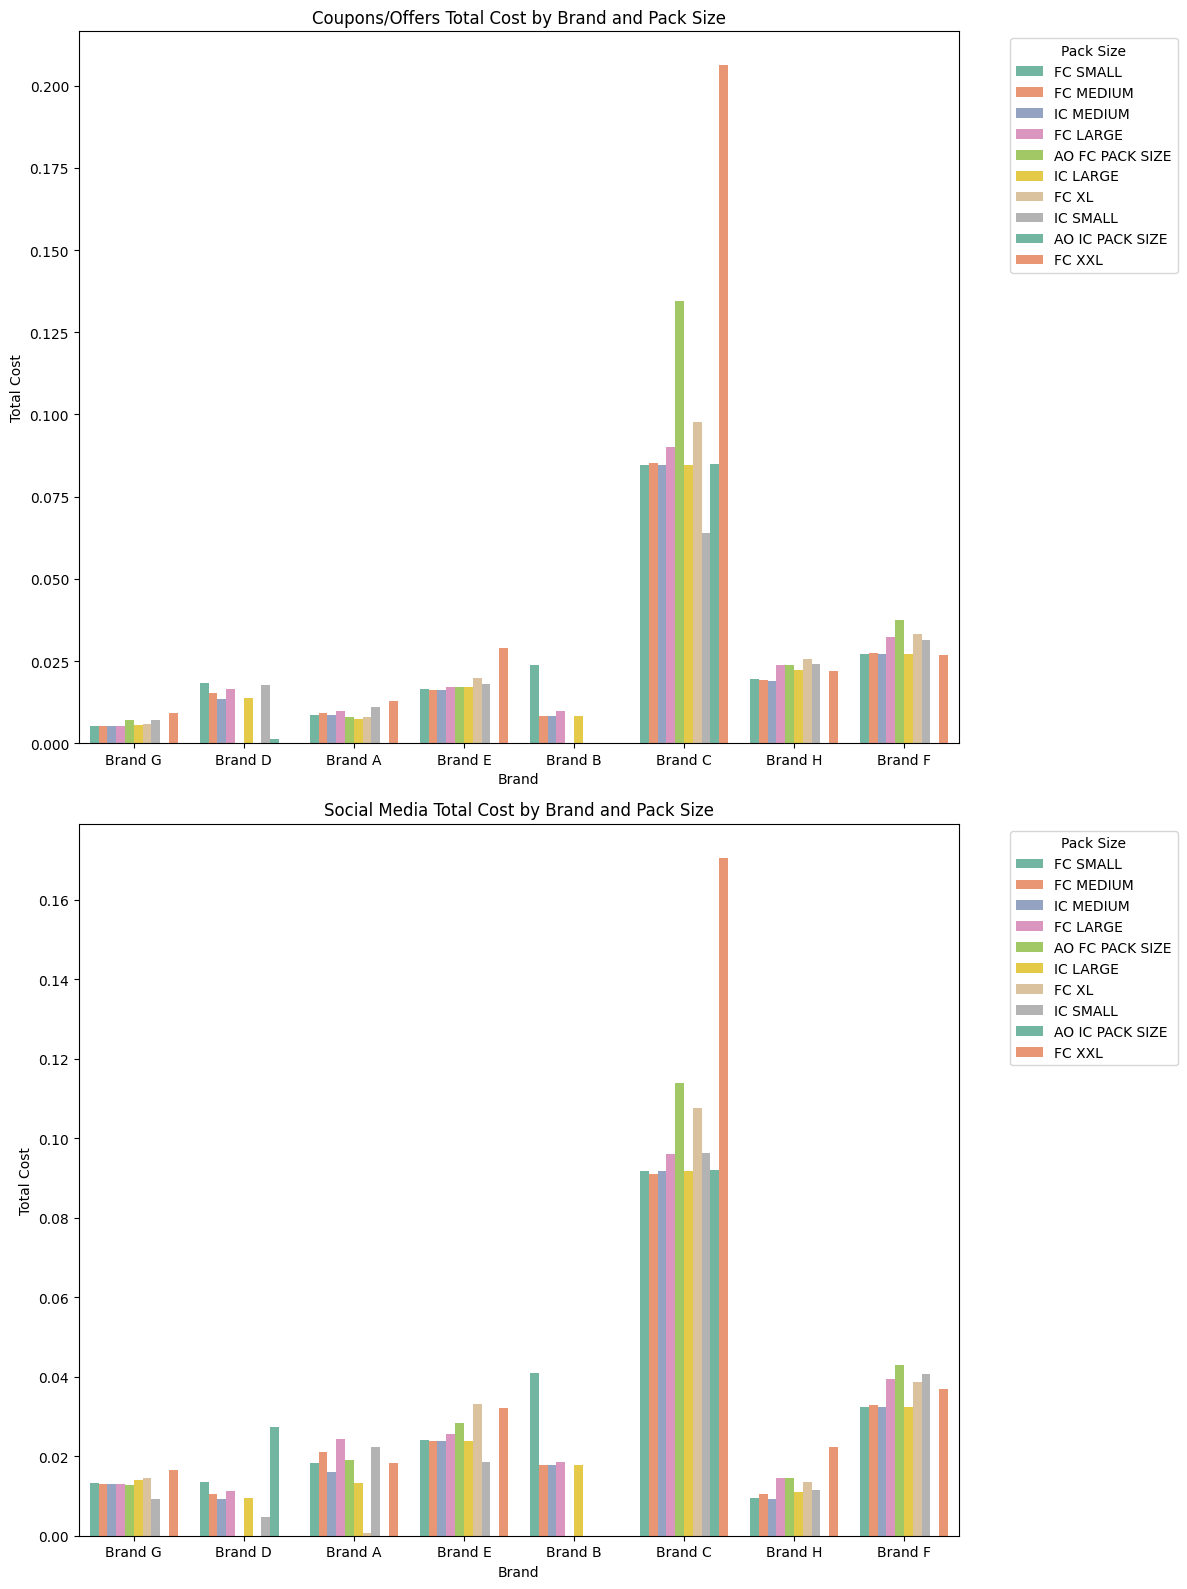

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure layout with subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

# Grouped bar chart for Coupons/offers total costs
sns.barplot(ax=ax1, data=data, x='BRAND', y='CP_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)
ax1.set_title('Coupons/Offers Total Cost by Brand and Pack Size')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Total Cost')
ax1.legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Grouped bar chart for Social media total costs
sns.barplot(ax=ax2, data=data, x='BRAND', y='SM_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)
ax2.set_title('Social Media Total Cost by Brand and Pack Size')
ax2.set_xlabel('Brand')
ax2.set_ylabel('Total Cost')
ax2.legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Save the combined plot as an image file
plt.savefig('coupons_offers_and_social_media_total_cost.png')

# Show the plot
plt.show()


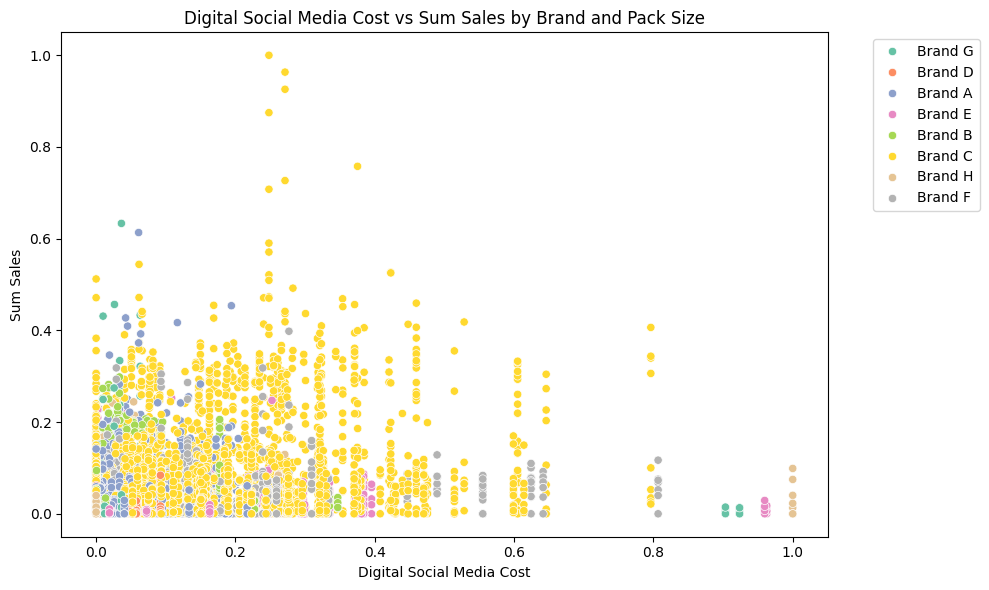

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Digital Social Media Cost vs sum_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='Digital_SM_COST', y='sum_Sales', hue='BRAND', palette='Set2')
plt.title('Digital Social Media Cost vs Sum Sales by Brand and Pack Size')
plt.xlabel('Digital Social Media Cost')
plt.ylabel('Sum Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('DigSMcost_vs_sumsales.png')

plt.show()


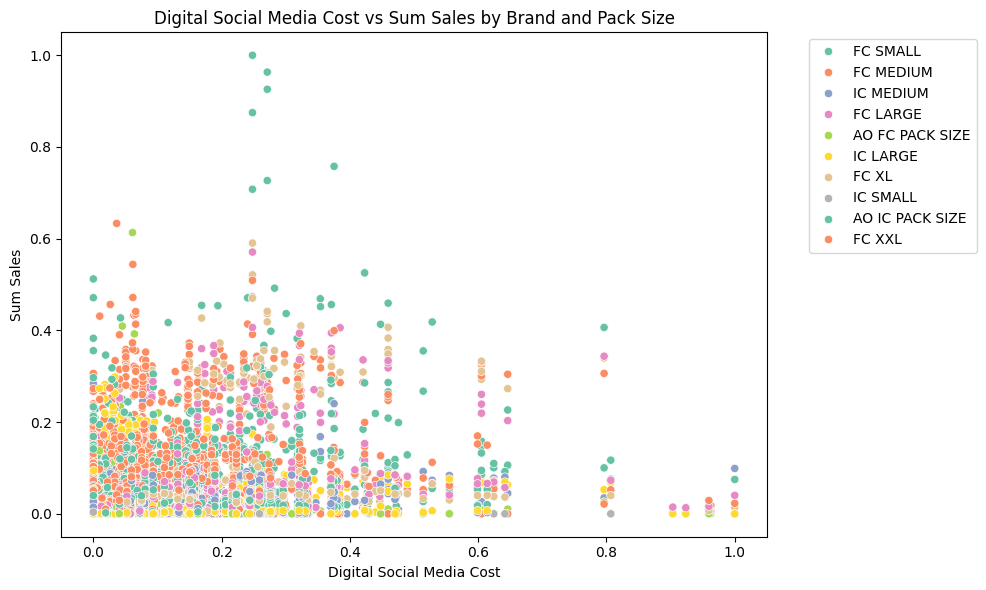

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Digital Social Media Cost vs sum_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data, x='Digital_SM_COST', y='sum_Sales', hue='PACK SIZE', palette='Set2')
plt.title('Digital Social Media Cost vs Sum Sales by Brand and Pack Size')
plt.xlabel('Digital Social Media Cost')
plt.ylabel('Sum Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-56-5392424049c6>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data, x='BRAND', y='Digital_CP_COST', hue='PACK SIZE', palette='Set2', ci=None)


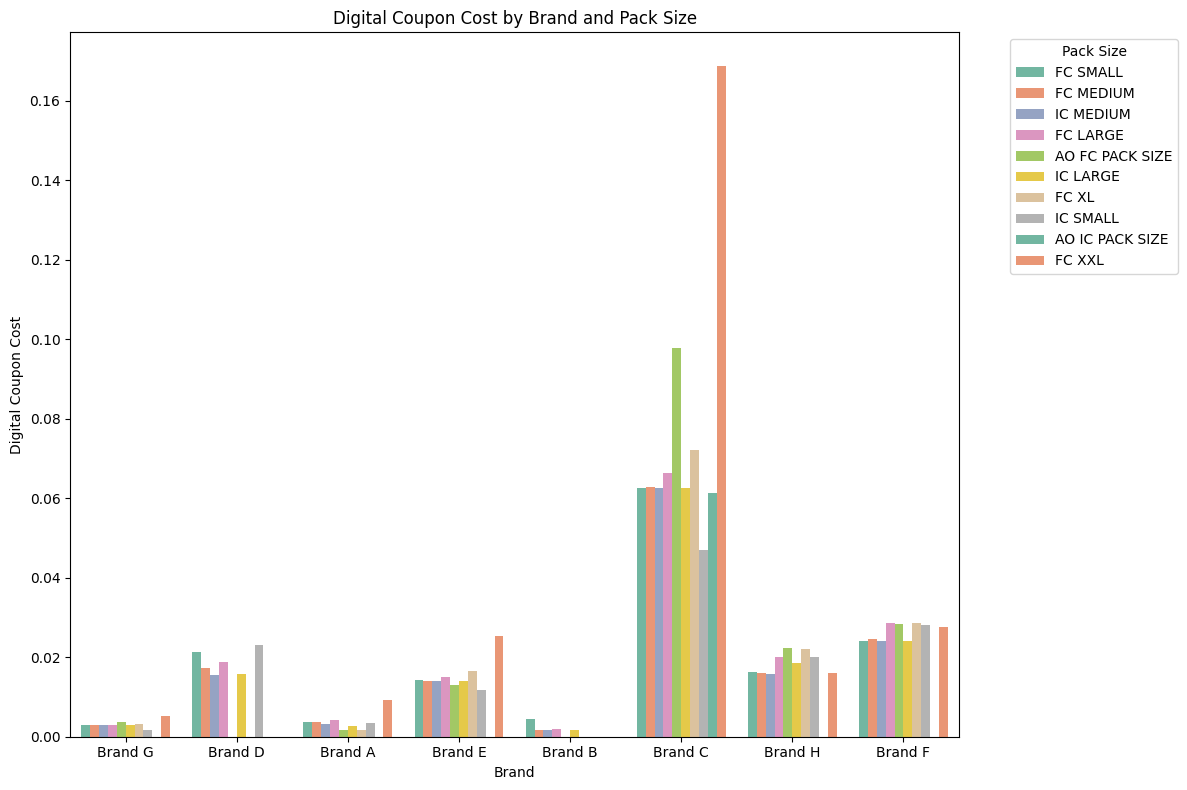

<ipython-input-56-5392424049c6>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data, x='BRAND', y='In Store_CP_COST', hue='PACK SIZE', palette='Set2', ci=None)


<Figure size 640x480 with 0 Axes>

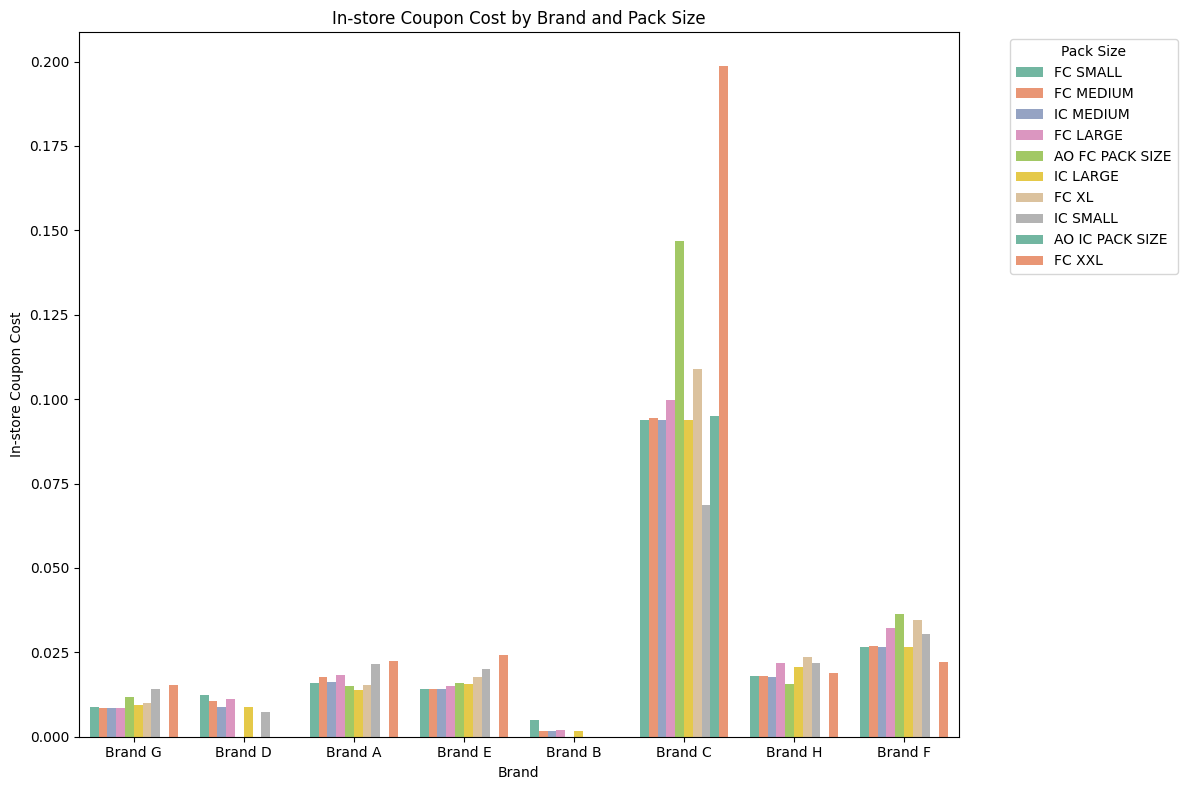

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped bar chart for Digital and In-store coupon costs
plt.figure(figsize=(12, 8))

# Grouped bar chart for Digital coupon costs
sns.barplot(data, x='BRAND', y='Digital_CP_COST', hue='PACK SIZE', palette='Set2', ci=None)
plt.title('Digital Coupon Cost by Brand and Pack Size')
plt.xlabel('Brand')
plt.ylabel('Digital Coupon Cost')
plt.legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.savefig('Digcoupcost.png')

plt.figure(figsize=(12, 8))

# Grouped bar chart for In-store coupon costs
sns.barplot(data, x='BRAND', y='In Store_CP_COST', hue='PACK SIZE', palette='Set2', ci=None)
plt.title('In-store Coupon Cost by Brand and Pack Size')
plt.xlabel('Brand')
plt.ylabel('In-store Coupon Cost')
plt.legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('instcoupcost.png')

plt.show()


<ipython-input-57-0e3b442bed80>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data, x='BRAND', y='CP_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)


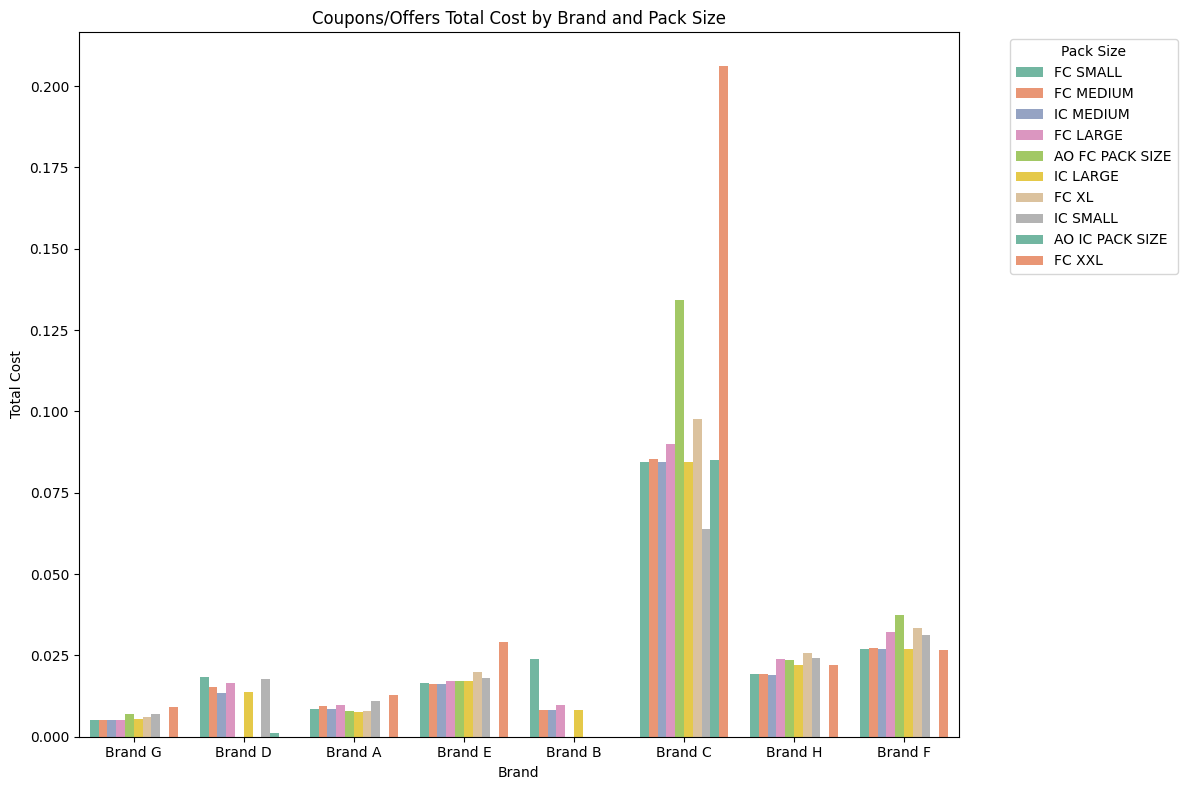

<ipython-input-57-0e3b442bed80>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data, x='BRAND', y='SM_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)


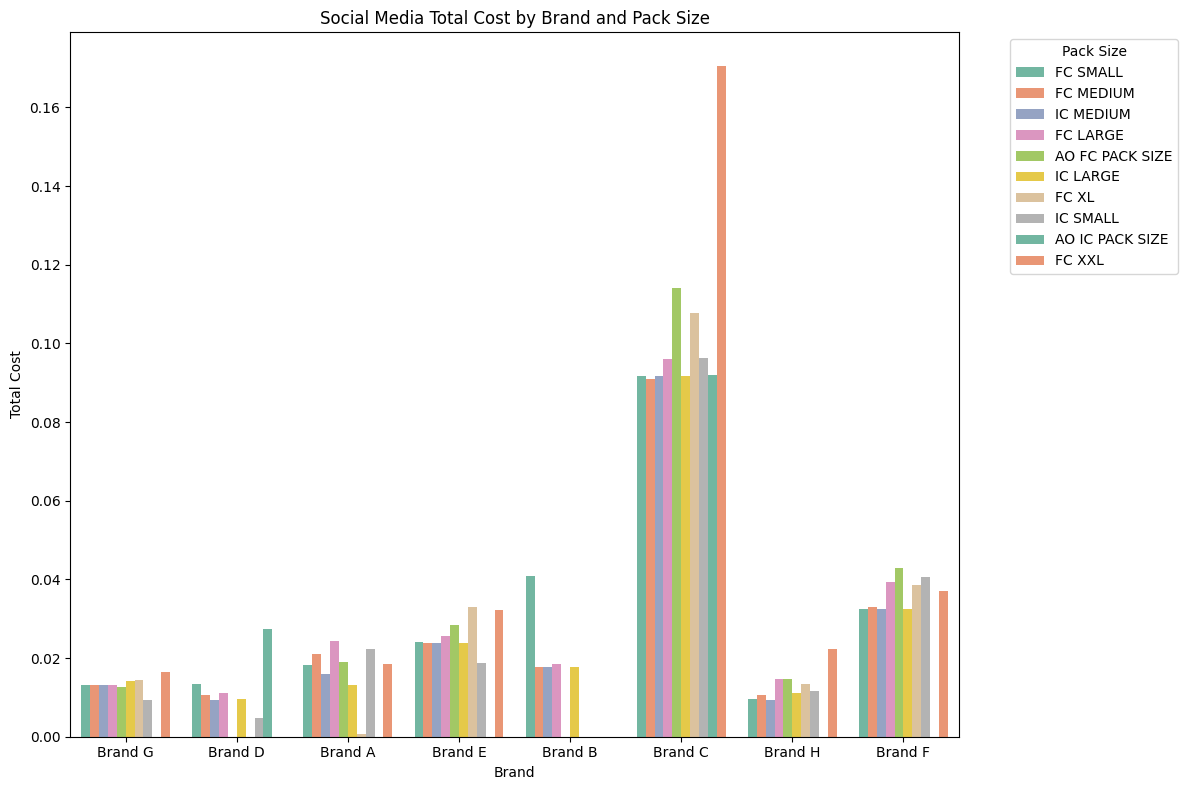

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouped bar chart for Coupons/Offers Total Cost
plt.figure(figsize=(12, 8))

# Grouped bar chart for Coupons/Offers Total Cost
sns.barplot(data, x='BRAND', y='CP_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)
plt.title('Coupons/Offers Total Cost by Brand and Pack Size')
plt.xlabel('Brand')
plt.ylabel('Total Cost')
plt.legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Grouped bar chart for Social Media Total Cost
plt.figure(figsize=(12, 8))

# Grouped bar chart for Social Media Total Cost
sns.barplot(data, x='BRAND', y='SM_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)
plt.title('Social Media Total Cost by Brand and Pack Size')
plt.xlabel('Brand')
plt.ylabel('Total Cost')
plt.legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-58-88172928b317>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 0], data=data, x='BRAND', y='Others_SM_COST', hue='PACK SIZE', palette='Set2', ci=None)
<ipython-input-58-88172928b317>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 1], data=data, x='BRAND', y='In Store_SM_COST', hue='PACK SIZE', palette='Set2', ci=None)
<ipython-input-58-88172928b317>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 0], data=data, x='BRAND', y='Digital_SM_COST', hue='PACK SIZE', palette='Set2', ci=None)
<ipython-input-58-88172928b317>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 1], data=data, x='BRAND', y='CP_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)


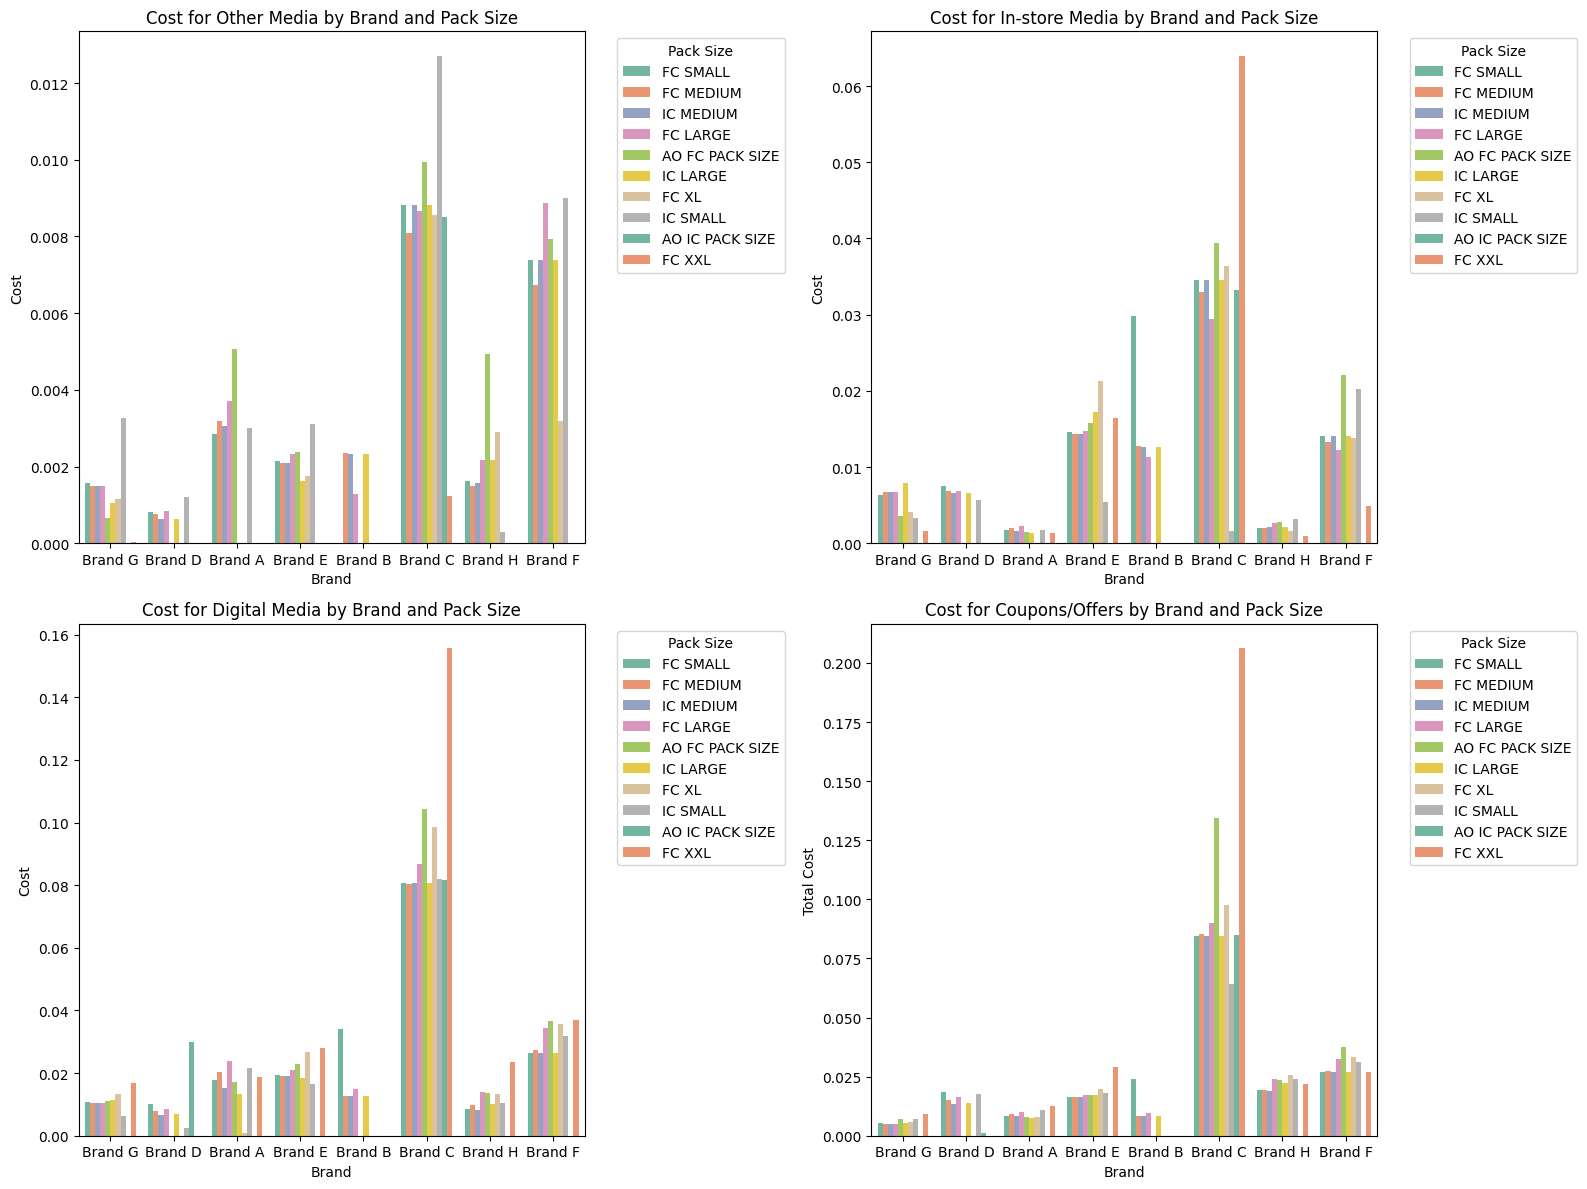

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Cost for Other Media
sns.barplot(ax=axes[0, 0], data=data, x='BRAND', y='Others_SM_COST', hue='PACK SIZE', palette='Set2', ci=None)
axes[0, 0].set_title('Cost for Other Media by Brand and Pack Size')
axes[0, 0].set_xlabel('Brand')
axes[0, 0].set_ylabel('Cost')
axes[0, 0].legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Cost for In-store Media
sns.barplot(ax=axes[0, 1], data=data, x='BRAND', y='In Store_SM_COST', hue='PACK SIZE', palette='Set2', ci=None)
axes[0, 1].set_title('Cost for In-store Media by Brand and Pack Size')
axes[0, 1].set_xlabel('Brand')
axes[0, 1].set_ylabel('Cost')
axes[0, 1].legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Cost for Digital Media
sns.barplot(ax=axes[1, 0], data=data, x='BRAND', y='Digital_SM_COST', hue='PACK SIZE', palette='Set2', ci=None)
axes[1, 0].set_title('Cost for Digital Media by Brand and Pack Size')
axes[1, 0].set_xlabel('Brand')
axes[1, 0].set_ylabel('Cost')
axes[1, 0].legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Cost for Coupons/Offers
sns.barplot(ax=axes[1, 1], data=data, x='BRAND', y='CP_TOTAL_COST', hue='PACK SIZE', palette='Set2', ci=None)
axes[1, 1].set_title('Cost for Coupons/Offers by Brand and Pack Size')
axes[1, 1].set_xlabel('Brand')
axes[1, 1].set_ylabel('Total Cost')
axes[1, 1].legend(title='Pack Size', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.savefig('costs_vis.png')

plt.show()



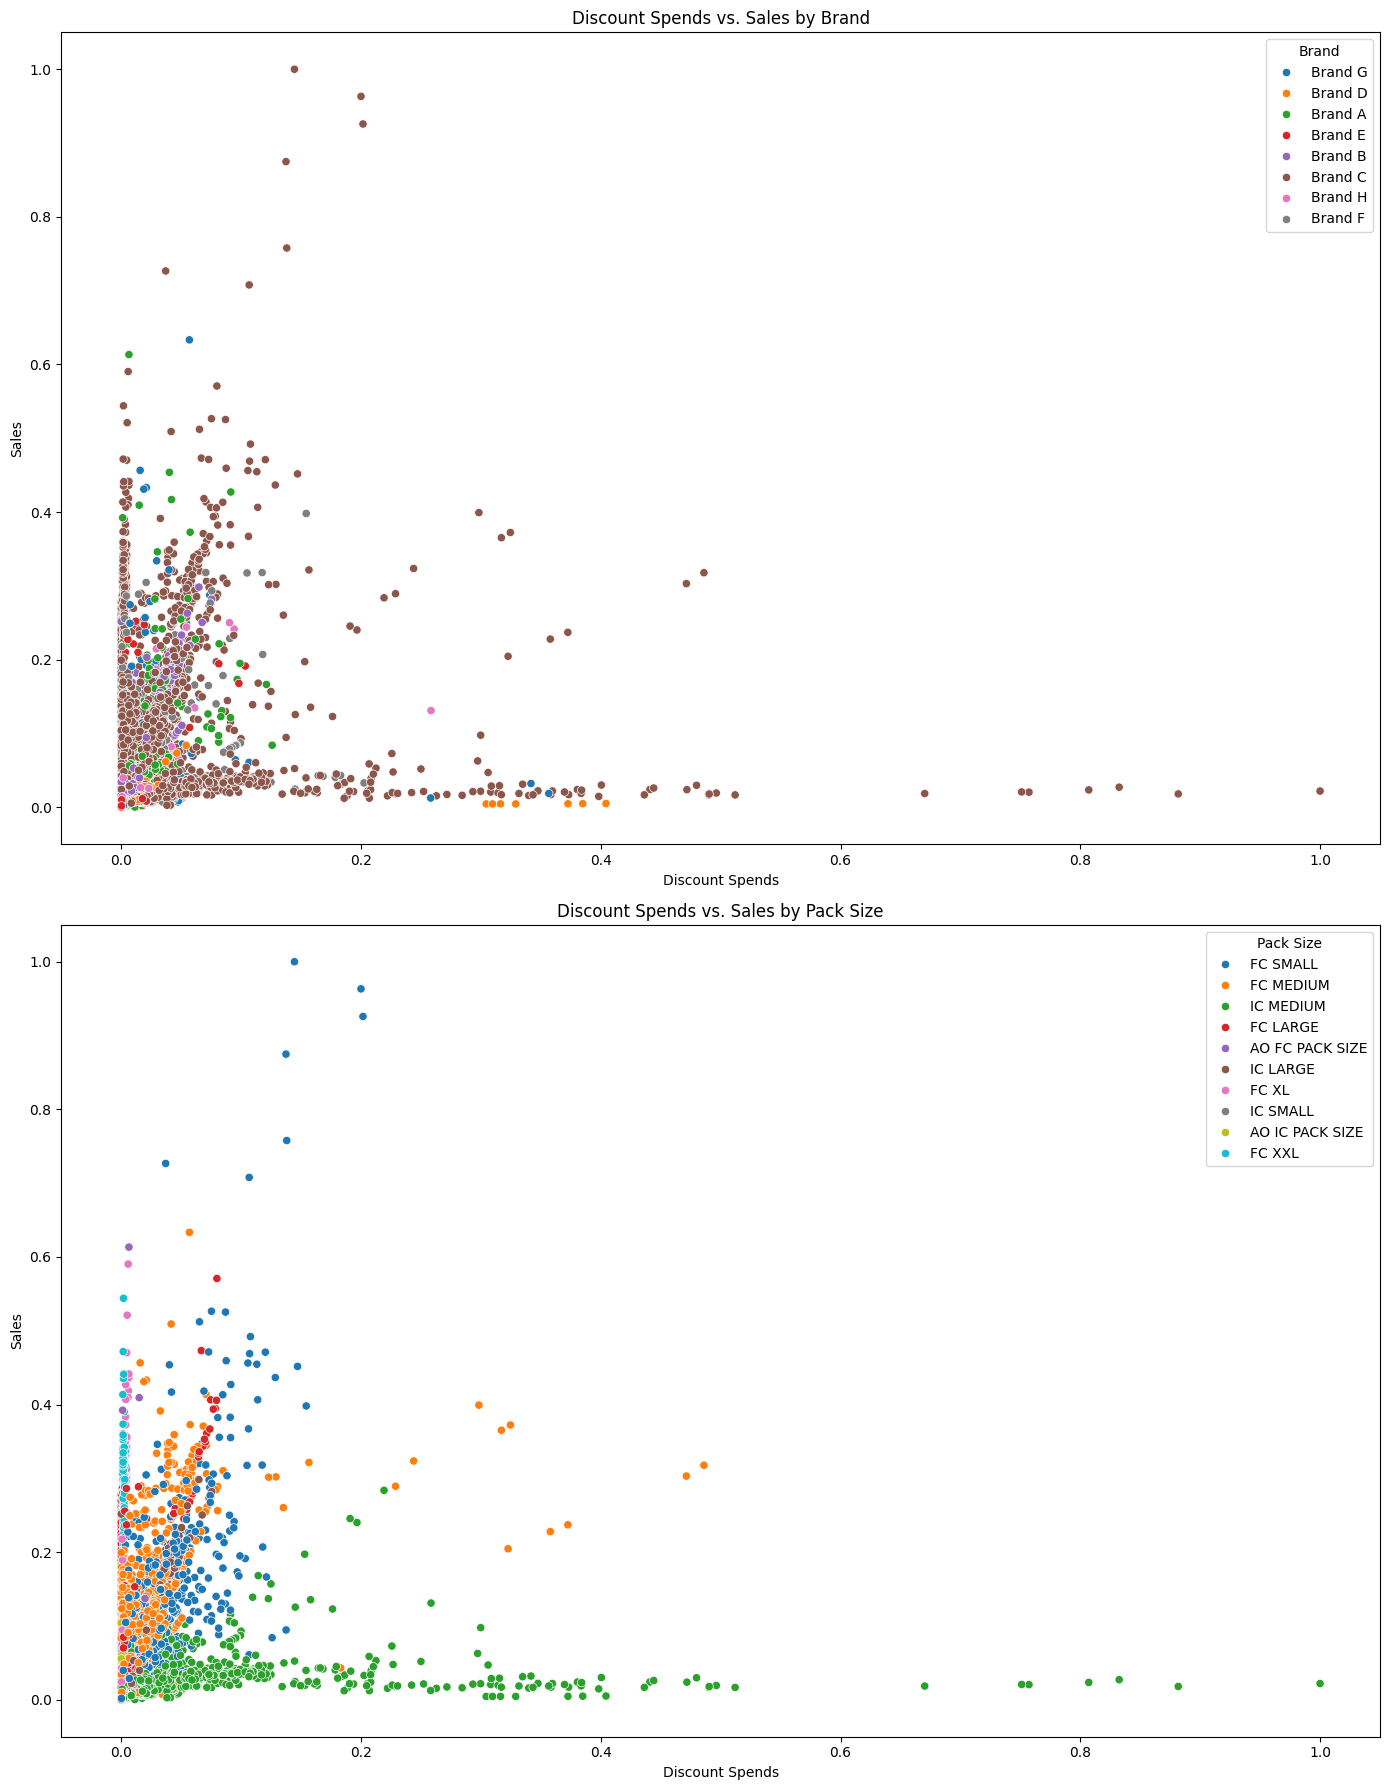

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure layout with subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 18))

# Scatter plot for discount spends vs. sales by Brand
sns.scatterplot(ax=ax1, x='sum_Disc_Spends', y='sum_Sales', hue='BRAND', data=data)
ax1.set_title('Discount Spends vs. Sales by Brand')
ax1.set_xlabel('Discount Spends')
ax1.set_ylabel('Sales')
ax1.legend(title='Brand')

# Scatter plot for discount spends vs. sales by Pack Size
sns.scatterplot(ax=ax2, x='sum_Disc_Spends', y='sum_Sales', hue='PACK SIZE', data=data)
ax2.set_title('Discount Spends vs. Sales by Pack Size')
ax2.set_xlabel('Discount Spends')
ax2.set_ylabel('Sales')
ax2.legend(title='Pack Size')

# Adjust layout
plt.tight_layout()
plt.savefig('costs_visualization.png')

# Show the plot
plt.show()


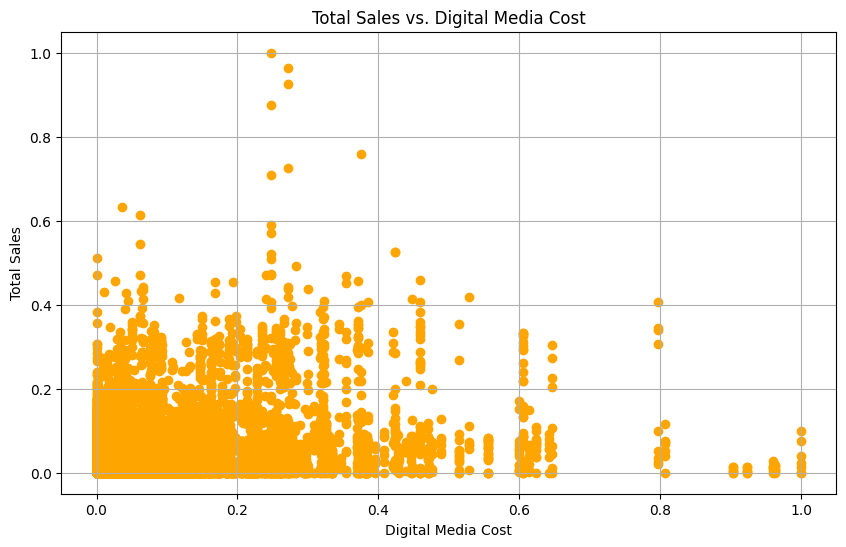

In [60]:
# 4. Total Sales vs. Digital Media Cost
plt.figure(figsize=(10, 6))
plt.scatter(data['Digital_SM_COST'], data['sum_Sales'], color='orange')
plt.xlabel('Digital Media Cost')
plt.ylabel('Total Sales')
plt.title('Total Sales vs. Digital Media Cost')
plt.grid(True)
plt.show()

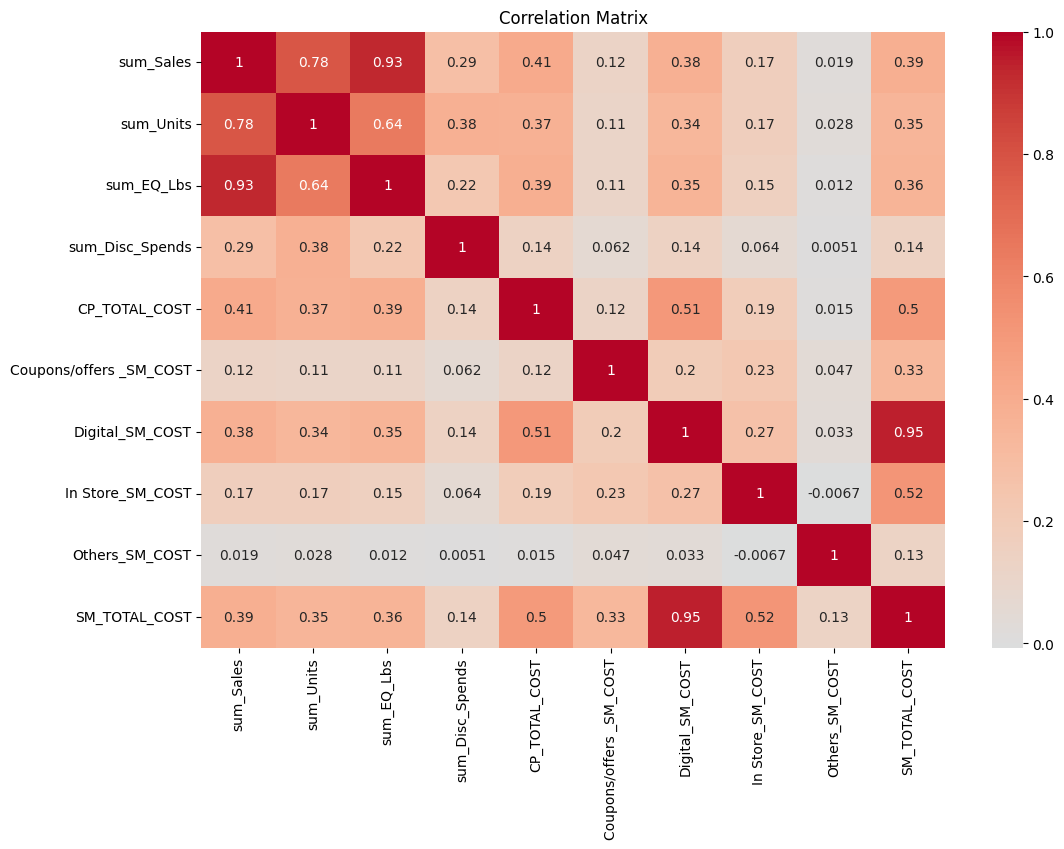

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select relevant columns for correlation matrix
selected_columns = [
    'sum_Sales', 'sum_Units', 'sum_EQ_Lbs', 'sum_Disc_Spends', 'CP_TOTAL_COST',
    'Coupons/offers _SM_COST', 'Digital_SM_COST', 'In Store_SM_COST',
    'Others_SM_COST', 'SM_TOTAL_COST'
]

# Calculate the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


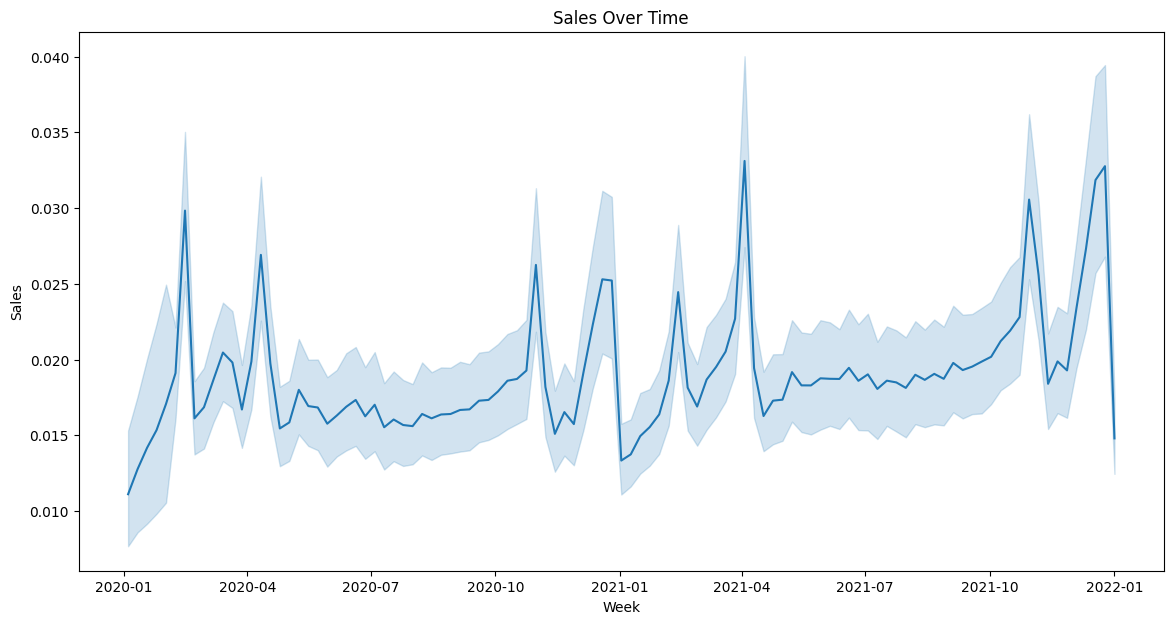

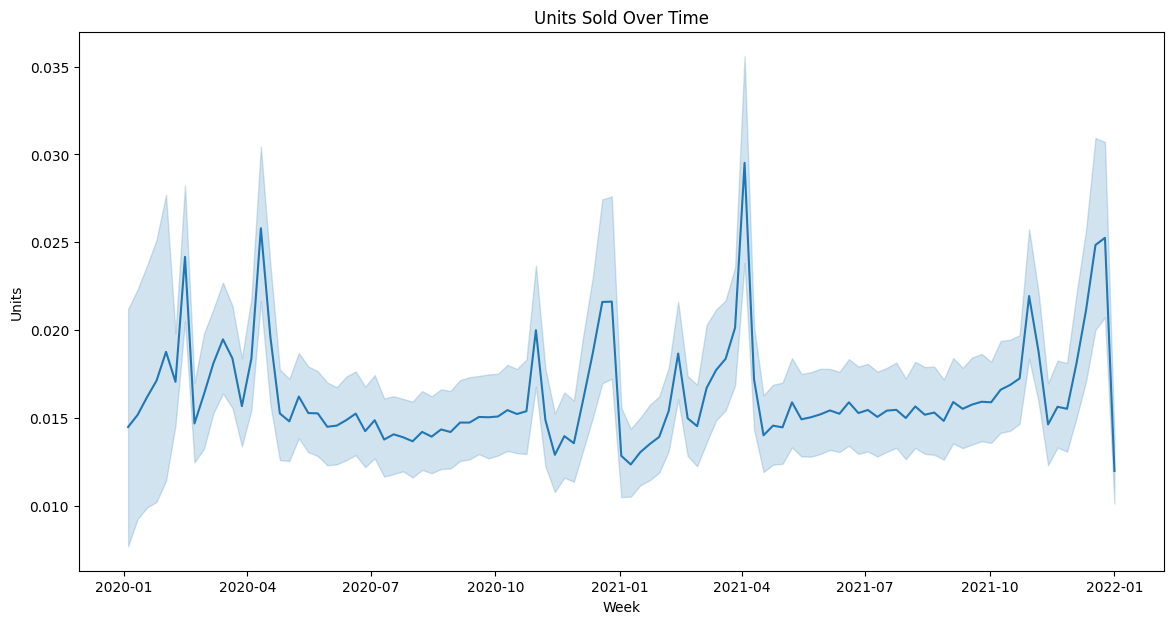

In [62]:
# Time series plot for sum_Sales
plt.figure(figsize=(14, 7))
sns.lineplot(x='Weeks', y='sum_Sales', data=data)
plt.title('Sales Over Time')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

# Time series plot for sum_Units
plt.figure(figsize=(14, 7))
sns.lineplot(x='Weeks', y='sum_Units', data=data)
plt.title('Units Sold Over Time')
plt.xlabel('Week')
plt.ylabel('Units')
plt.show()


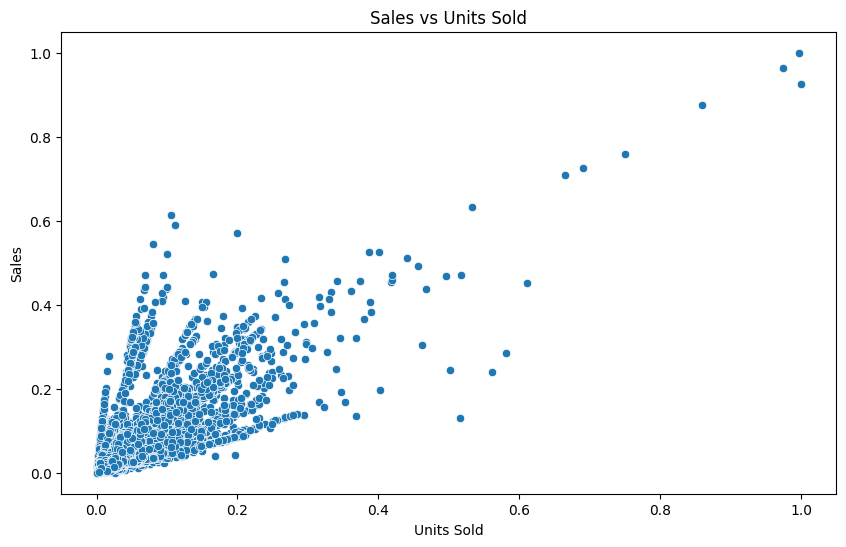

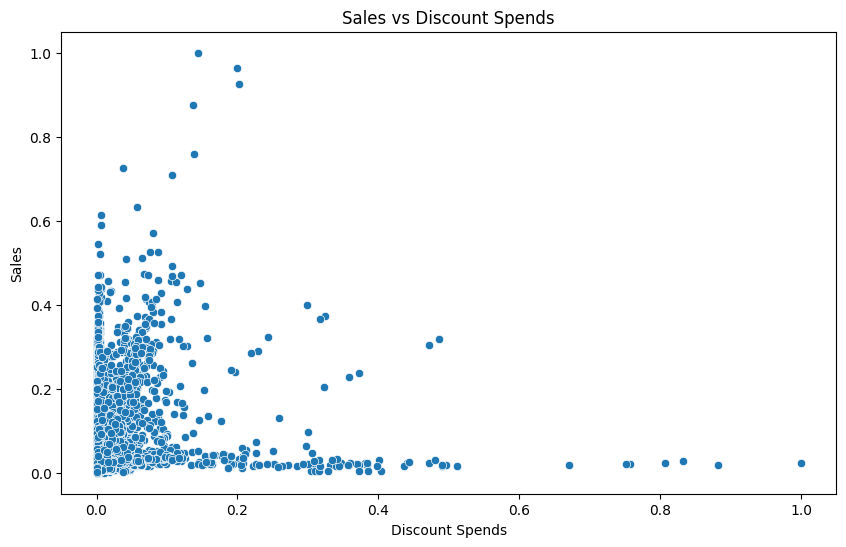

In [63]:
# Scatter plot for sum_Sales vs sum_Units
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_Units', y='sum_Sales', data=data)
plt.title('Sales vs Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Sales')
plt.show()

# Scatter plot for sum_Sales vs sum_Disc_Spends
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum_Disc_Spends', y='sum_Sales', data=data)
plt.title('Sales vs Discount Spends')
plt.xlabel('Discount Spends')
plt.ylabel('Sales')
plt.show()


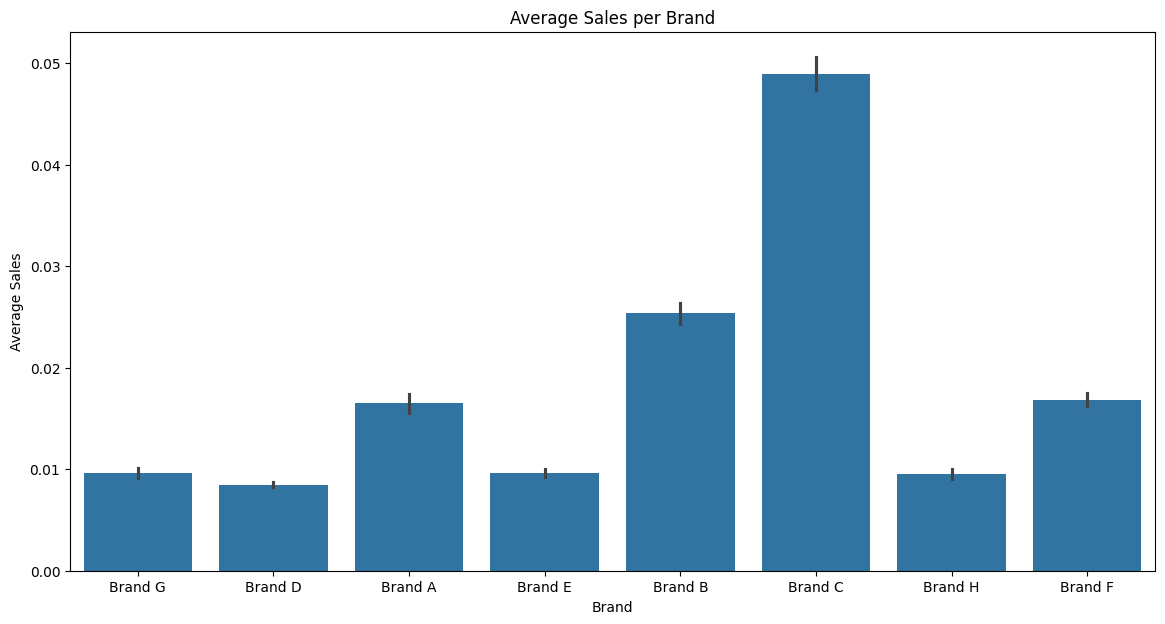

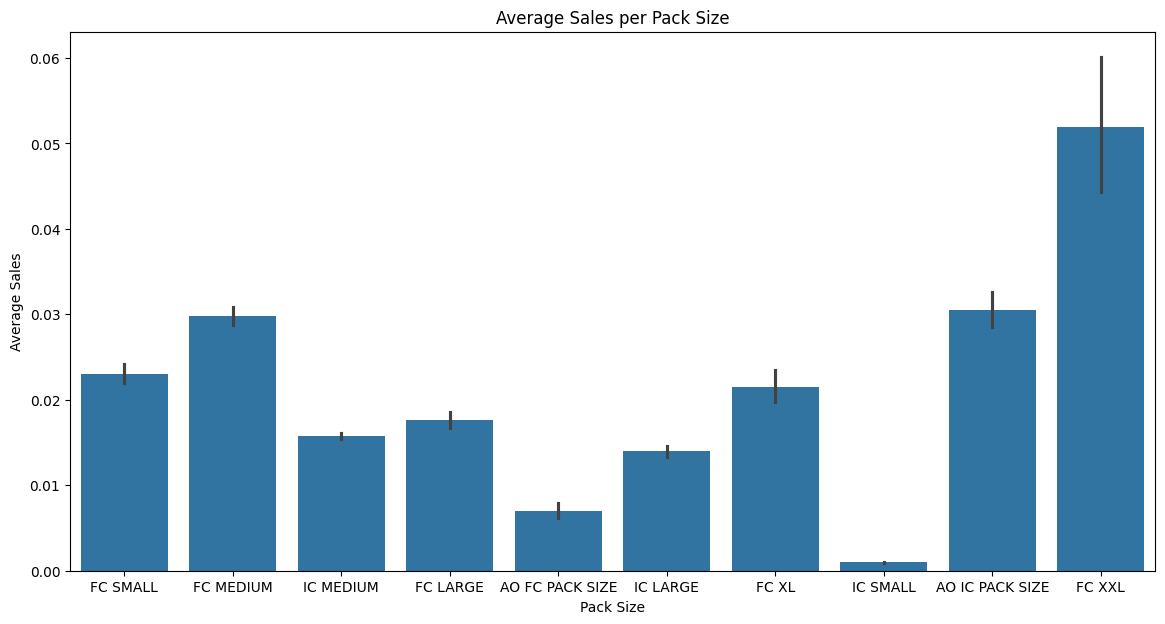

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average sales per brand
# Bar plot for average sales per brand
plt.figure(figsize=(14, 7))
sns.barplot(x='BRAND', y='sum_Sales', data=data, estimator=np.mean)
plt.title('Average Sales per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Sales')
plt.show()

# Bar plot for average sales per pack size
plt.figure(figsize=(14, 7))
sns.barplot(x='PACK SIZE', y='sum_Sales', data=data, estimator=np.mean)
plt.title('Average Sales per Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Average Sales')
plt.show()


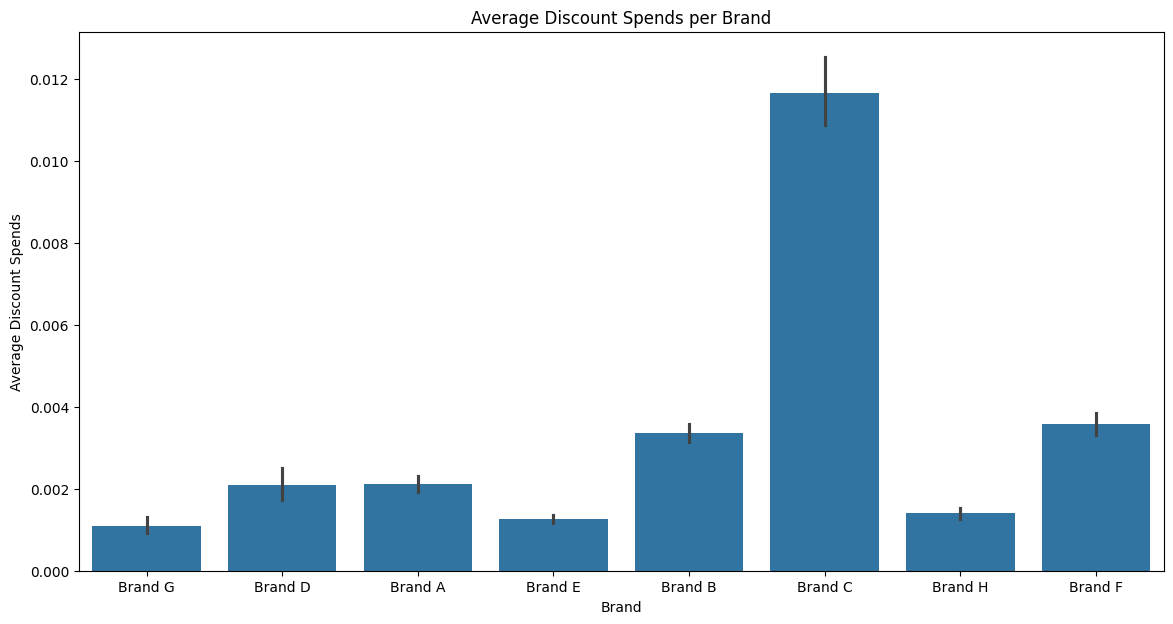

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for average discount spends per brand
plt.figure(figsize=(14, 7))
sns.barplot(x='BRAND', y='sum_Disc_Spends', data=data, estimator=np.mean)
plt.title('Average Discount Spends per Brand')
plt.xlabel('Brand')
plt.ylabel('Average Discount Spends')
plt.show()


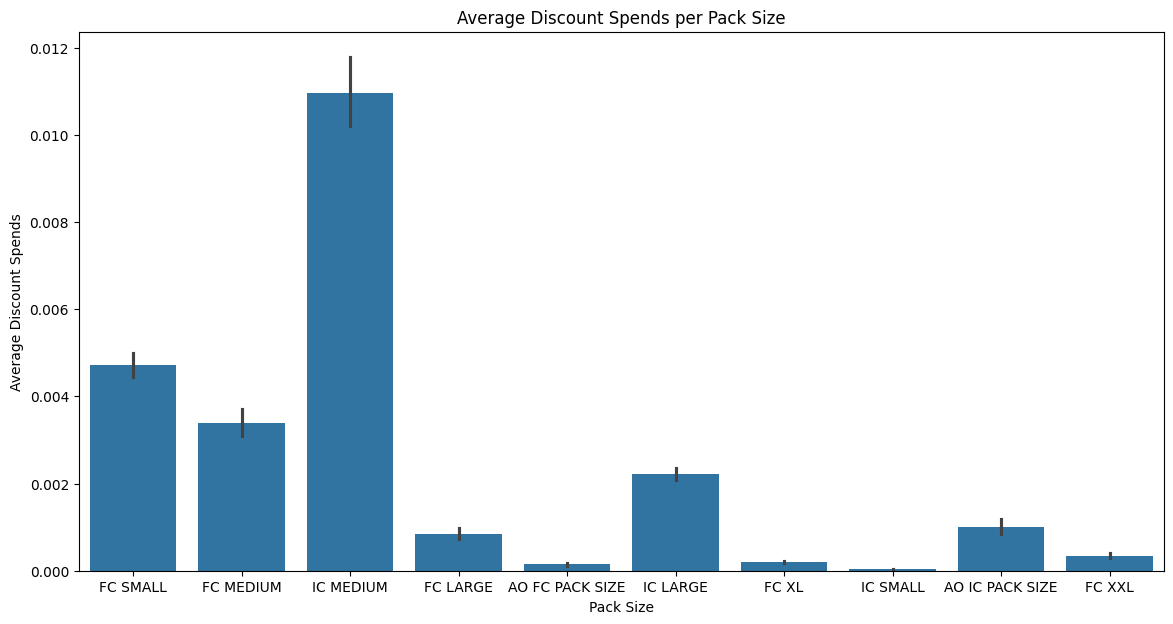

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for average discount spends per pack size
plt.figure(figsize=(14, 7))
sns.barplot(x='PACK SIZE', y='sum_Disc_Spends', data=data, estimator=np.mean)
plt.title('Average Discount Spends per Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Average Discount Spends')
plt.show()


**step 3:feature engineering**

In [67]:
# Create lag features for time series analysis
data.sort_values(by='Weeks', inplace=True)
data['Sales_Lag_1'] = data['sum_Sales'].shift(1)
data['Sales_Lag_2'] = data['sum_Sales'].shift(2)
data['Units_Lag_1'] = data['sum_Units'].shift(1)
data['Units_Lag_2'] = data['sum_Units'].shift(2)

In [70]:
# Encode categorical variables using one-hot encoding
categorical_cols = ['BRAND', 'CONSUMPTION', 'PACK SIZE']

data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Verify the encoding
print(data_encoded.head())


           week_year  sum_Sales  sum_Units  sum_EQ_Lbs  sum_Disc_Spends  \
Weeks                                                                     
2020-01-04   2020 02   0.017794   0.024829    0.020032     1.005277e-03   
2020-01-04   2020 02   0.000005   0.000009    0.000005     0.000000e+00   
2020-01-04   2020 02   0.002201   0.002529    0.003404     7.063082e-05   
2020-01-04   2020 02   0.009072   0.012657    0.009756     1.458940e-04   
2020-01-04   2020 02   0.000125   0.000064    0.000088     2.870783e-07   

            sum_Own_TDP  sum_Disp_wo_Feat_DiscAcv  sum_Feat_wo_Disp_DiscAcv  \
Weeks                                                                         
2020-01-04     0.177795                  0.109551                       0.0   
2020-01-04     0.000166                  0.000000                       0.0   
2020-01-04     0.045728                  0.030014                       0.0   
2020-01-04     0.095314                  0.083078                       0.0   


**Step 4:Training**

In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
features =  [
    'SM_TOTAL_COST',  'CP_TOTAL_COST', 'sum_Disc_Spends', 'sum_Units', 'sum_EQ_Lbs'
]

target = 'sum_Sales'

# Prepare the data
X = data[features]
y = data[target]

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the imputer with the 'mean' strategy
imputer = SimpleImputer(strategy='mean')

In [74]:
# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [75]:
X_train_imputed, X_test_imputed, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_imputed, y_train)
lr_train_score = lr.score(X_train_imputed, y_train)
lr_test_score = lr.score(X_test_imputed, y_test)
lr_mse = mean_squared_error(y_test, lr.predict(X_test_imputed))
lr_r2 = r2_score(y_test, lr.predict(X_test_imputed))

In [78]:
print("Linear Regression:")
print("Training Score:", lr_train_score)
print("Test Score:", lr_test_score)
print("MSE:", lr_mse)
print("R-squared:", lr_r2)

Linear Regression:
Training Score: 0.9303942391423337
Test Score: 0.9316189718091363
MSE: 0.00012000255876875954
R-squared: 0.9316189718091363


In [80]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_imputed, y_train)
ridge_train_score = ridge.score(X_train_imputed, y_train)
ridge_test_score = ridge.score(X_test_imputed, y_test)
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test_imputed))
ridge_r2 = r2_score(y_test, ridge.predict(X_test_imputed))


In [81]:
print("\nRidge Regression:")
print("Training Score:", ridge_train_score)
print("Test Score:", ridge_test_score)
print("MSE:", ridge_mse)
print("R-squared:", ridge_r2)


Ridge Regression:
Training Score: 0.9302358974658782
Test Score: 0.931815684999554
MSE: 0.00011965734479906312
R-squared: 0.931815684999554


In [82]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_imputed, y_train)
lasso_train_score = lasso.score(X_train_imputed, y_train)
lasso_test_score = lasso.score(X_test_imputed, y_test)
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test_imputed))
lasso_r2 = r2_score(y_test, lasso.predict(X_test_imputed))


In [83]:
print("\nLasso Regression:")
print("Training Score:", lasso_train_score)
print("Test Score:", lasso_test_score)
print("MSE:", lasso_mse)
print("R-squared:", lasso_r2)


Lasso Regression:
Training Score: 0.0
Test Score: -0.00017226012145732383
MSE: 0.001755212426597358
R-squared: -0.00017226012145732383


In [84]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_imputed, y_train)
rf_train_score = rf.score(X_train_imputed, y_train)
rf_test_score = rf.score(X_test_imputed, y_test)
rf_mse = mean_squared_error(y_test, rf.predict(X_test_imputed))
rf_r2 = r2_score(y_test, rf.predict(X_test_imputed))

In [85]:
print("\nRandom Forest Regressor:")
print("Training Score:", rf_train_score)
print("Test Score:", rf_test_score)
print("MSE:", rf_mse)
print("R-squared:", rf_r2)


Random Forest Regressor:
Training Score: 0.9955631238254651
Test Score: 0.9725743463476835
MSE: 4.812955729471588e-05
R-squared: 0.9725743463476835


In [86]:
import pandas as pd


print(data['week_year'].head(20))


Weeks
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
2020-01-04    2020 02
Name: week_year, dtype: object


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [88]:
# Function to parse 'YYYY WW' format to the first day of the week
def parse_week_year(week_year):
    year, week = map(int, week_year.split())
    return pd.to_datetime(f'{year}-W{week - 1}-1', format='%Y-W%W-%w')

# Apply the function to parse the 'week_year' column
data['week_year'] = data['week_year'].apply(parse_week_year)

# Create lag features for time series analysis
data.sort_values(by='week_year', inplace=True)
data['Sales_Lag_1'] = data['sum_Sales'].shift(1)
data['Sales_Lag_2'] = data['sum_Sales'].shift(2)
data['Units_Lag_1'] = data['sum_Units'].shift(1)
data['Units_Lag_2'] = data['sum_Units'].shift(2)

# Aggregate data at the monthly level
data.set_index('week_year', inplace=True)
monthly_data = data.resample('M').sum().reset_index()

# Verify the aggregation
print(monthly_data.head())


   week_year                                              BRAND  \
0 2020-01-31  Brand FBrand CBrand CBrand CBrand CBrand BBran...   
1 2020-02-29  Brand CBrand CBrand CBrand DBrand ABrand EBran...   
2 2020-03-31  Brand HBrand FBrand FBrand EBrand EBrand FBran...   
3 2020-04-30  Brand FBrand FBrand FBrand FBrand FBrand BBran...   
4 2020-05-31  Brand HBrand ABrand ABrand FBrand HBrand CBran...   

                                         CONSUMPTION  \
0  FCFCICFCICICFCFCICFCFCFCICFCICFCICFCFCFCFCFCIC...   
1  FCFCICFCFCFCFCICICFCFCFCFCFCFCFCFCICFCICFCFCFC...   
2  FCICICFCICFCFCICFCFCFCFCFCICFCFCICICICFCFCFCIC...   
3  FCFCICFCICFCICFCFCFCICICFCICICFCFCICFCFCFCFCIC...   
4  FCFCFCFCFCFCFCFCFCICICFCFCICICFCFCFCFCFCICFCFC...   

                                           PACK SIZE  sum_Sales  sum_Units  \
0  FC SMALLAO FC PACK SIZEIC MEDIUMFC SMALLAO IC ...   2.653158   3.133104   
1  FC SMALLFC XLAO IC PACK SIZEFC LARGEAO FC PACK...  36.206271  31.339866   
2  FC SMALLIC LARGEIC SMAL

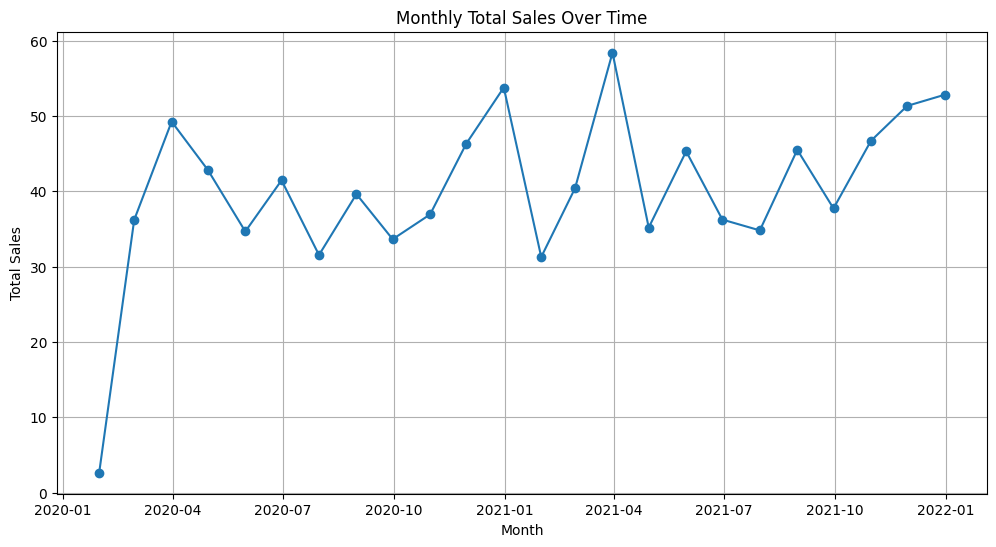

In [89]:
# Plot the time series to check for stationarity
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['week_year'], monthly_data['sum_Sales'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales Over Time')
plt.grid(True)
plt.show()

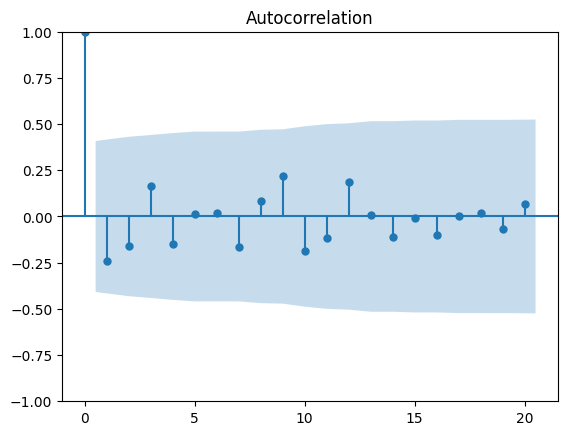

In [90]:
# Differencing to make the series stationary
monthly_data['Sales_Diff'] = monthly_data['sum_Sales'].diff().dropna()

# Plot ACF and PACF
plot_acf(monthly_data['Sales_Diff'].dropna(), lags=20)
plt.show()

                               SARIMAX Results                                
Dep. Variable:              sum_Sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -88.548
Date:                Thu, 27 Jun 2024   AIC                            183.096
Time:                        21:01:53   BIC                            186.502
Sample:                             0   HQIC                           183.952
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0801      0.288      0.278      0.781      -0.484       0.644
ma.L1         -0.8169      0.259     -3.152      0.002      -1.325      -0.309
sigma2       123.9228     36.368      3.407      0.0

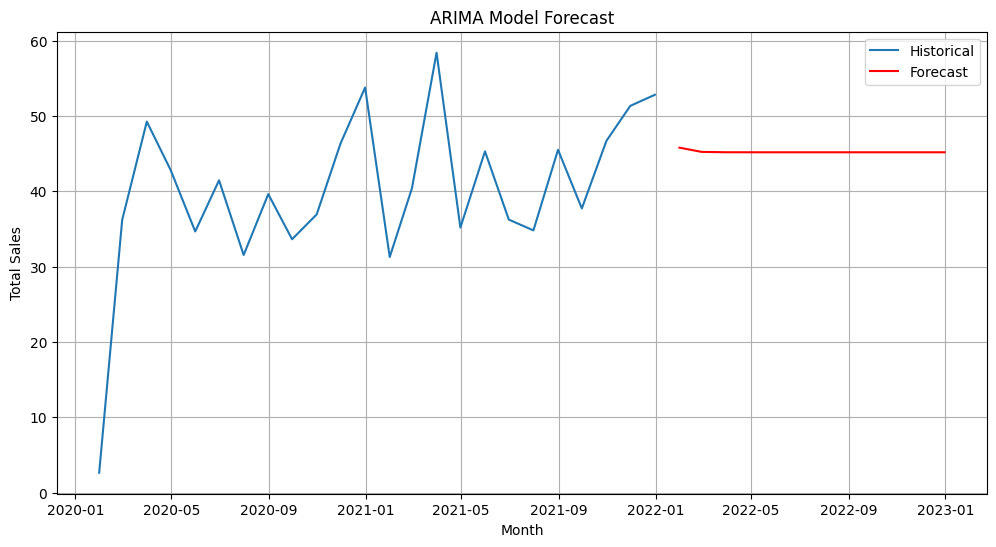

In [91]:
# Use the order (p, d, q) from the ACF and PACF plots
p = 1  # Adjust based on PACF
d = 1  # Adjust based on differencing
q = 1  # Adjust based on ACF

# Fit the ARIMA model
arima_model = ARIMA(monthly_data['sum_Sales'], order=(p, d, q))
arima_result = arima_model.fit()

# Summary of the ARIMA model
print(arima_result.summary())

# Forecast future values
forecast_steps = 12  # Number of months to forecast
forecast = arima_result.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['week_year'], monthly_data['sum_Sales'], label='Historical')
plt.plot(pd.date_range(start=monthly_data['week_year'].iloc[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecast', color='red')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [93]:
data['sales_category'] = (data['sum_Sales'] > data['sum_Sales'].median()).astype(int)

# Select relevant features
features = [
    'SM_TOTAL_COST',  'CP_TOTAL_COST', 'sum_Disc_Spends', 'sum_Units', 'sum_EQ_Lbs'
]
target = 'sales_category'

# Prepare the data
X = data[features]
y = data[target]

In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Fit the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate the model
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [96]:
print("Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Logistic Regression:
Accuracy: 0.8550508069336521
Precision: 0.8777260178966269
Recall: 0.8550508069336521


In [97]:
# Fit the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the model
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [98]:
print("Support Vector Machines:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Support Vector Machines:
Accuracy: 0.9209005778043435
Precision: 0.9211241493587402
Recall: 0.9209005778043435


In [99]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [100]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Random Forest Classifier:
Accuracy: 0.9708109185096633
Precision: 0.9708435246445938
Recall: 0.9708109185096633


In [101]:
from sklearn.naive_bayes import GaussianNB
# Fit the Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate the model
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [102]:
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Naive Bayes Classifier:
Accuracy: 0.8768679019725045
Precision: 0.8903550791390684
Recall: 0.8768679019725045


In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


In [104]:
print("K-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

K-Nearest Neighbors Classifier:
Accuracy: 0.9407252440725244
Precision: 0.940726513170273
Recall: 0.9407252440725244
